<a href="https://colab.research.google.com/github/GokayToga/Data-Science-Salaries-Prediction/blob/main/Data_Science_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Import the required libraries


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
!mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss


## Importing the Dataset


Read your the chosen dataset into pandas dataframe:


In [ ]:
data = pd.read_csv('DataScience_salaries_2024.csv')
data.head()
#labs/ML240EN/DataScience_salaries_2024.csv

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


My main objective in this analysis is to determine the best regression model to develop on for the salaries of Data Science engineers and predict possible salary values according to the data features I have selected for better prediction taking into consideration the importance of the features to the data and the predictions.

# 1. About the Data


This dataset is about data science job salaries from 2020 to 2024, including information on experience levels, employment types, job titles, and company characteristics, it includes these features




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


Lets understand our data better with some visuals


- Histogram of salary_in_usd so we can see the distribution of the salary

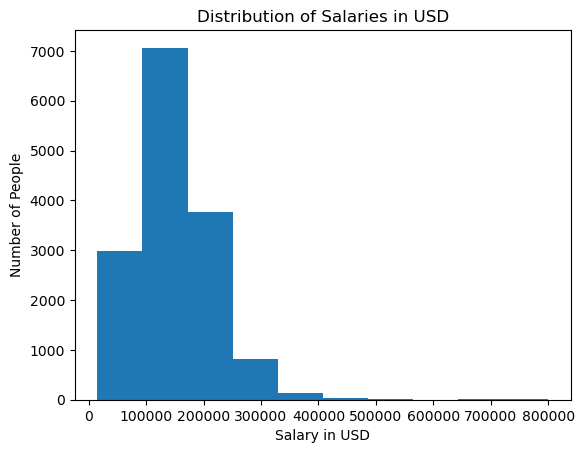

In [ ]:
plt.hist(data["salary_in_usd"])
plt.xlabel("Salary in USD")
plt.ylabel("Number of People")
plt.title("Distribution of Salaries in USD")
plt.show()

- Box Plot of salary by experience level

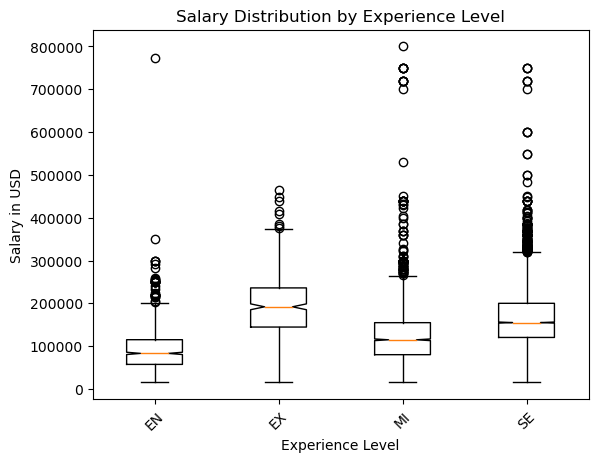

In [ ]:
# Group data by experience level
grouped_by_exp = data.groupby("experience_level")

# Prepare data for Matplotlib boxplot
data_plot = [group["salary_in_usd"] for name, group in grouped_by_exp]
labels = [name for name, group in grouped_by_exp]

plt.boxplot(data_plot, labels=labels, notch=True)
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")
plt.title("Salary Distribution by Experience Level")
plt.xticks(rotation=45)
plt.show()

- Line plot of average salary over work years

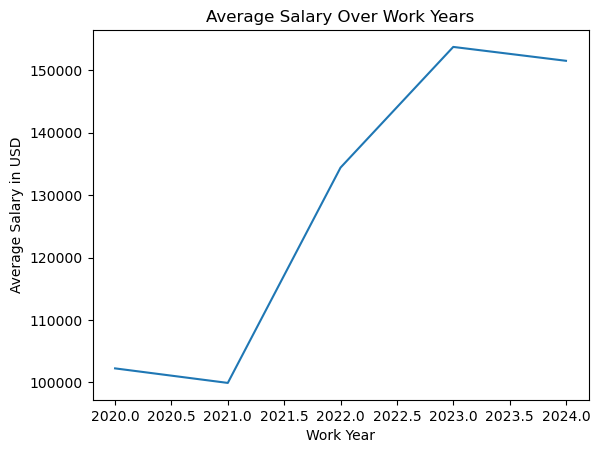

In [ ]:
avg_salary_per_year = data.groupby("work_year")["salary_in_usd"].mean()

plt.plot(avg_salary_per_year.index, avg_salary_per_year.values)
plt.xlabel("Work Year")
plt.ylabel("Average Salary in USD")
plt.title("Average Salary Over Work Years")
plt.show()

- Bar chart of average salary by company size

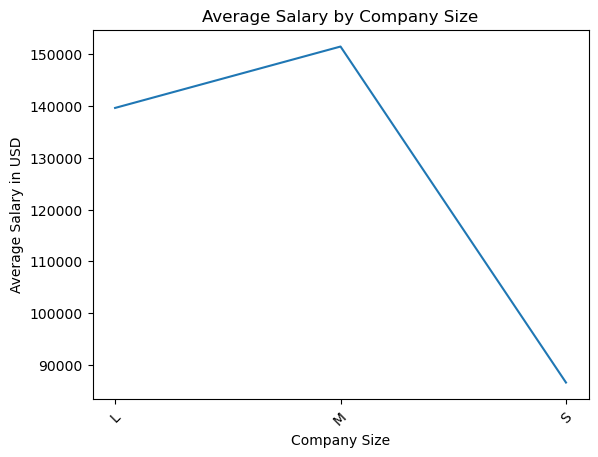

In [ ]:
avg_salary_by_size = data.groupby("company_size")["salary_in_usd"].mean()

plt.plot(avg_salary_by_size.index, avg_salary_by_size.values)
plt.xlabel("Company Size")
plt.ylabel("Average Salary in USD")
plt.title("Average Salary by Company Size")
plt.xticks(rotation=45)
plt.show()

- Bar chart of average salary by experience_level

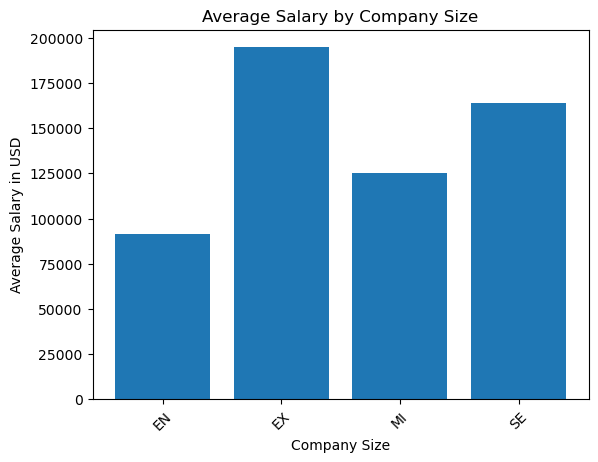

In [ ]:
avg_salary_by_size = data.groupby("experience_level")["salary_in_usd"].mean()

plt.bar(avg_salary_by_size.index, avg_salary_by_size.values)
plt.xlabel("Company Size")
plt.ylabel("Average Salary in USD")
plt.title("Average Salary by Company Size")
plt.xticks(rotation=45)
plt.show()

We see that in general company size experience level and job titles are the ones that impact the result mostly

# Pre-processing: Feature selection/extraction


First we drop the irrelevant columns acordingly  for my desired model that aims to predicts the salary of the job in usd acording to the company size, experience level and job title

In [ ]:
data_filtered = data.drop(['salary', 'salary_currency', 'employee_residence', 'company_location', 'remote_ratio', 'work_year'], axis = 1)


In [ ]:
exclude_types = ['PT', 'CT', 'FL']
df_filtered = data_filtered[~data_filtered['employment_type'].isin(exclude_types)]

df_filtered = df_filtered.drop(['employment_type'], axis = 1)

In [ ]:
df_filtered.head()


,experience_level,job_title,salary_in_usd,company_size
0,MI,Data Scientist,40038,L
1,MI,BI Data Analyst,36259,L
2,MI,Data Scientist,35735,L
3,MI,ML Engineer,77364,S
4,SE,Lead Machine Learning Engineer,95386,L


 In this step we encode the categorical collums wiht one-hot encodings


In [ ]:
categorical_cols = ['company_size', 'experience_level', 'job_title']  # Columns to encode

Feature = pd.get_dummies(df_filtered, columns=categorical_cols)
Feature.head()

,salary_in_usd,company_size_L,company_size_M,company_size_S,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,job_title_AI Architect,job_title_AI Developer,...,job_title_Quantitative Research Analyst,job_title_Research Analyst,job_title_Research Engineer,job_title_Research Scientist,job_title_Robotics Engineer,job_title_Robotics Software Engineer,job_title_Software Data Engineer,job_title_Staff Data Analyst,job_title_Staff Data Scientist,job_title_Staff Machine Learning Engineer
0,40038,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36259,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35735,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,77364,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,95386,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


 In this final step we create the train-test data split


In [ ]:
X = Feature.drop('salary_in_usd', axis=1)
y = Feature['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Training set has 11817 samples.
Testing set has 2955 samples.
Train set:  (11817, 157) (11817,)
Test set:  (2955, 157) (2955,)


# 2. Objectives


Now for our model testing I have chosen 3 different models to test:
- Linear Regression model, a good starting point and easy to interpret.
- Random Forests Regression, a good ensemble method that combines multiple trees for prediction and can handle both linear and non-linear relationships.
- Support Vector Regression, provides good efficiency for high-dimensional data and usefull in dealing with outliers.

# 3. Linear Regression Models


Linear Regression model

- We first create the LR model
- Then train the model with the train sets
- Make predictions on the test set
- Finally Evaluate the model performance with mean squared error and use a simple loop to determine the best C values

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse_lr}")

C_values = [0.001, 0.01, 0.1, 1, 10, 100]

for C in C_values:
    lr_model.C = C_values
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (C values = {C}): {mse}")


Mean Squared Error: 2.1779412434094937e+28
Mean Squared Error (C values = 0.001): 2.1779412434094937e+28
Mean Squared Error (C values = 0.01): 2.1779412434094937e+28
Mean Squared Error (C values = 0.1): 2.1779412434094937e+28
Mean Squared Error (C values = 1): 2.1779412434094937e+28
Mean Squared Error (C values = 10): 2.1779412434094937e+28
Mean Squared Error (C values = 100): 2.1779412434094937e+28


Random Forest Regression model

- We first create the RF model
- Then train the model with the train sets
- Make predictions on the test set
- Finally Evaluate the model performance with mean squared error and use a simple loop to determine the best estimator value

In [ ]:
import warnings

# Suppress warnings about np.int deprecation and distutils
warnings.filterwarnings("ignore", message=".*np.int.*")
warnings.filterwarnings("ignore", message=".*distutils Version classes.*")

rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_rf}")

for k in [25, 50, 100, 150]:
    rf_model.n_estimators = k
    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (estimators = {k}): {mse}")

Mean Squared Error: 3706165848.755002
Mean Squared Error (estimators = 25): 3706165848.755002
Mean Squared Error (estimators = 50): 3706165848.755002
Mean Squared Error (estimators = 100): 3706165848.755002
Mean Squared Error (estimators = 150): 3706165848.755002


Support Vector Regression

- We first create the SVR model
- Then train the model with the train sets
- Make predictions on the test set
- Finally Evaluate the model performance with mean squared error testing and use a simple loop to determine the best kernel

In [ ]:
svr_model = SVR(gamma='auto')
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_svr}")

for k in ('linear', 'poly', 'rbf','sigmoid'):
    #svr_model = SVR( kernel = k).fit(X_train,y_train)
    svr_model.kernel = k
    y_pred = svr_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error(kernel = {k}): {mse}")

#chosing the smallest value
svr_model.kernel = 'linear'
y_pred = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error(Chosen): {mse_svr}")

Mean Squared Error: 4927238180.435404
Mean Squared Error(kernel = linear): 4846750161.180057
Mean Squared Error(kernel = poly): 4928287518.264239
Mean Squared Error(kernel = rbf): 4927238180.435404
Mean Squared Error(kernel = sigmoid): 4927753140.729757
Mean Squared Error(Chosen): 4846750161.180057


Logistic Regression

- We first create the LogR model
- Then train the model with the train sets
- Make predictions on the test set
- Finally Evaluate the model performance with mean squared error testing and use a loop to determine the best solver

In [ ]:
# Suppress the FutureWarning about multi_class
warnings.filterwarnings("ignore", message=".*Default multi_class will be changed to.*")

model_LR = LogisticRegression(solver='liblinear')
model_LR.fit(X_train, y_train)

y_pred = model_LR.predict(X_test)

mse_LR = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_LR}")

for k in ('lbfgs', 'saga', 'newton-cg', 'sag'):
    model_LR.solver = k  # Change the solver for each iteration
    y_pred = model_LR.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (solver = {k}): {mse}")

Mean Squared Error: 4899832008.563452
Mean Squared Error (solver = lbfgs): 4899832008.563452
Mean Squared Error (solver = saga): 4899832008.563452
Mean Squared Error (solver = newton-cg): 4899832008.563452
Mean Squared Error (solver = sag): 4899832008.563452


# 4. Insights and key findings


Plots for understanding the MSE Values

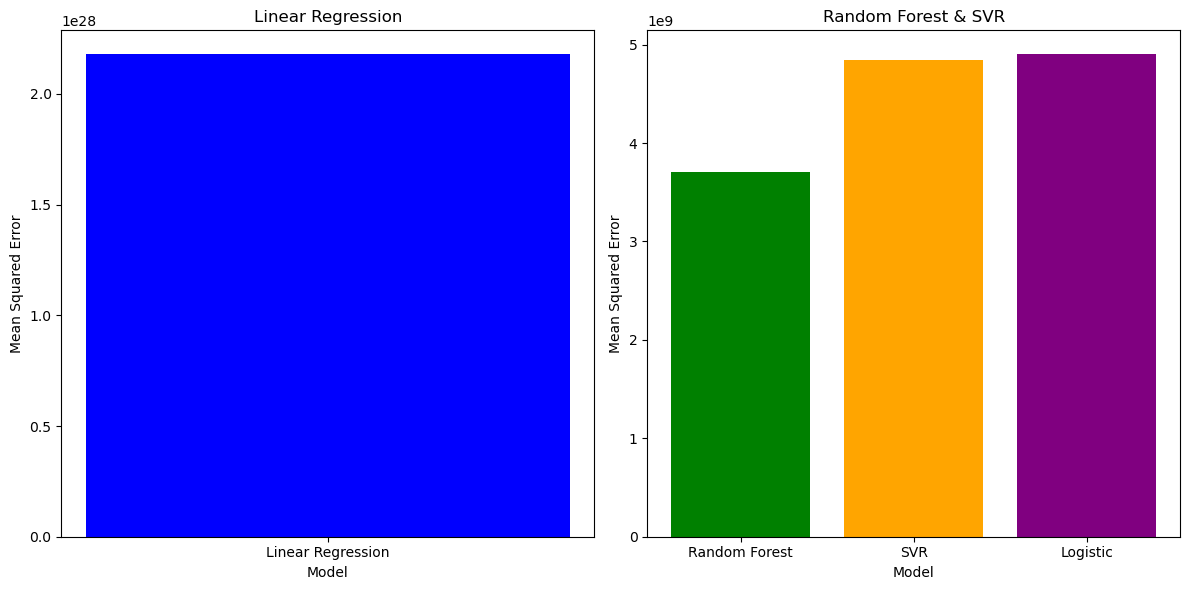

In [ ]:
# Model names
model_names = ['Random Forest', 'SVR', 'Logistic']

# MSE values
mse_values = [mse_rf, mse_svr, mse_LR]

# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot on the first subplot
axs[0].bar('Linear Regression', mse_lr, color='blue')
axs[0].set_xlabel("Model")
axs[0].set_ylabel("Mean Squared Error")
axs[0].set_title("Linear Regression")

# Plot on the second subplot
axs[1].bar(model_names, mse_values, color=['green', 'orange', 'purple'])
axs[1].set_xlabel("Model")
axs[1].set_ylabel("Mean Squared Error")
axs[1].set_title("Random Forest & SVR")

plt.tight_layout()

plt.show()

By looking at the values and the major differences between the Linear Regression and the others we can conclude that Linear Regression is the worst choice for the model the others 3 models give out very small MSE values while Linear Regression offers a very big value compared to the other models, Linear Regression lacked the understanding of the relations between the salary and the other features like company size, experience level, job_title while other models had a better understanding of the relations,linear regression model was too simple and linear to understand the 160+ features and its non-linearity of this data, the other 3 compared with each other shows that Random Forest was the best one to detect the relations between the encoded relations, between the other two SVR model was slightly better but still not good enough.

# 5. Next Steps


The next steps to follow can be deducted from the results we got from the MSE values the others 3 methods seem reasonable for know but the linear regression model is too off even though the other results are not very good either they hold better potential in contrast, main reason this results may have occurred can be under-fitting and the models unability to understand the large amount of features so the most probable next step is to try and reduce the under-fitting by methods like increasing the features of the data and focus on the other 3 models especially  the Random Forest model because that model has the lowest MSE value among the three.


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
